# Correlation between entropy/FD metrics

https://stochastic.readthedocs.io/en/stable/noise.html#stochastic.processes.noise.ColoredNoise

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import entropy as ent
import matplotlib.pyplot as plt
import stochastic.processes.noise as sn
sns.set(font_scale=1.25)

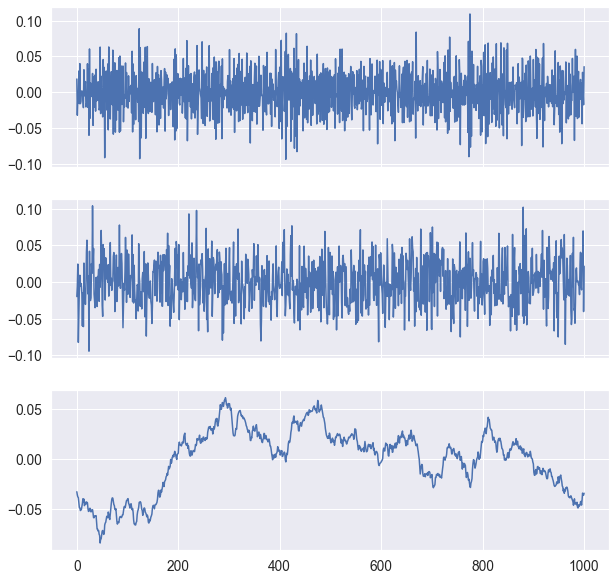

In [2]:
# Generate time-series with increasing B exponent
betas = np.arange(-2, 2.1, 0.1)
n_ts = betas.size
n_samples = 1000
sf = 10
ts = np.empty((n_ts, n_samples + 1))

for i, b in enumerate(betas):
    rng = np.random.default_rng(42)
    ts[i] = sn.ColoredNoise(beta=b, rng=rng).sample(n_samples)
    
# Plot the first, center and last time-series
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=False)
ax1.plot(ts[0])  # Violet noise
ax2.plot(ts[int(n_ts / 2)])  # White noise
ax3.plot(ts[-1]);  # Brownian noise

In [3]:
# Compute the entropy metrics
df = pd.DataFrame()

for i in range(n_ts):
    df = df.append({
        'PermEnt': ent.perm_entropy(ts[i], order=3, normalize=True),
        'SVDEnt' : ent.svd_entropy(ts[i], order=3, normalize=True),
        'SpecEnt' : ent.spectral_entropy(ts[i], sf, normalize=True),
        'AppEnt': ent.app_entropy(ts[i], order=2),
        'SampleEnt': ent.sample_entropy(ts[i], order=2),
        'PetrosianFD': ent.petrosian_fd(ts[i]),
        'KatzFD': ent.katz_fd(ts[i]),
        'HiguchiFD': ent.higuchi_fd(ts[i]),
        'DFA': ent.detrended_fluctuation(ts[i])}, ignore_index=True)

df.head().round(3)

/Users/raphael/GitHub/entropy/entropy/entropy.py:239: RuntimeWarning: divide by zero encountered in log2
  se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
/Users/raphael/GitHub/entropy/entropy/entropy.py:239: RuntimeWarning: invalid value encountered in multiply
  se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
/Users/raphael/GitHub/entropy/entropy/entropy.py:239: RuntimeWarning: divide by zero encountered in log2
  se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
/Users/raphael/GitHub/entropy/entropy/entropy.py:239: RuntimeWarning: invalid value encountered in multiply
  se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
/Users/raphael/GitHub/entropy/entropy/entropy.py:239: RuntimeWarning: divide by zero encountered in log2
  se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
/Users/raphael/GitHub/entropy/entropy/entropy.py:239: RuntimeWarning: invalid value encountered in multiply
  se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
/Users/raphael/GitHub/entropy/e

,AppEnt,DFA,HiguchiFD,KatzFD,PermEnt,PetrosianFD,SVDEnt,SampleEnt,SpecEnt
0,1.605,0.059,2.068,7.678,0.982,1.041,0.920,1.942,0.869
1,1.591,0.076,2.067,8.975,0.989,1.040,0.927,1.923,0.876
2,1.585,0.083,2.071,6.646,0.993,1.039,0.925,1.924,NaN
3,1.619,0.093,2.065,7.118,0.991,1.039,0.934,1.980,0.869
4,1.626,0.088,2.069,8.943,0.986,1.040,0.925,1.970,0.865


In [4]:
# Describe
df.agg(['min', 'median', 'max']).round(2).T

,min,median,max
AppEnt,0.34,1.62,1.70
DFA,0.06,0.53,1.52
HiguchiFD,1.44,2.00,2.07
KatzFD,1.90,4.88,8.97
PermEnt,0.94,0.99,1.00
PetrosianFD,1.02,1.04,1.04
SVDEnt,0.31,0.95,1.00
SampleEnt,0.30,2.05,2.26
SpecEnt,0.22,0.89,0.93


In [5]:
df.isna().sum()

AppEnt         0
DFA            0
HiguchiFD      0
KatzFD         0
PermEnt        0
PetrosianFD    0
SVDEnt         0
SampleEnt      0
SpecEnt        4
dtype: int64

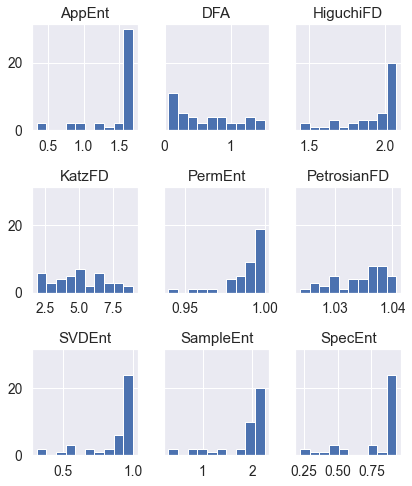

In [6]:
# Distribution
df.hist(figsize=(6, 7), layout=(3, 3), sharey=True)
plt.tight_layout()

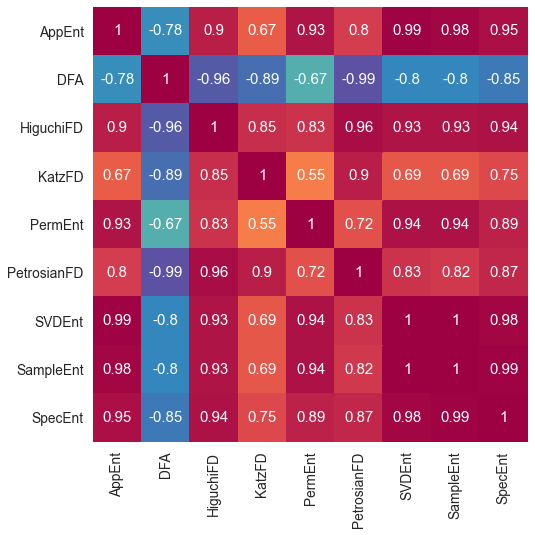

In [7]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cbar=False, 
            cmap='Spectral_r', square=True);

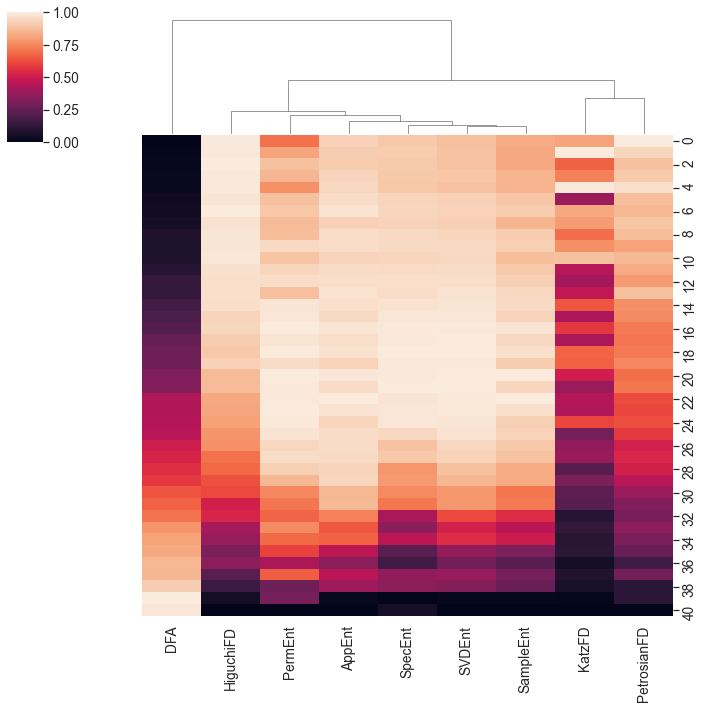

In [8]:
sns.clustermap(df.interpolate(), row_cluster=False, standard_scale=1);